# IDS PROJECT - Australian weather analysis

# .

## Importing the basic libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
# split data
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv("G:/weatherAUS.csv")
data1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [4]:
data1.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

In [5]:
data2 = data1.drop(axis=1,columns=["Evaporation", "Sunshine","Cloud9am","Cloud3pm","RISK_MM","Location"])
data2.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,12/2/2008,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12/3/2008,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,12/4/2008,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,12/5/2008,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [6]:
len(data2.dtypes)

18

In [7]:
data2.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235
std,6.403283,7.117618,8.465173,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


In [8]:
data2.describe(include='all')

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,142193,141556.000000,141871.000000,140787.000000,132863,132923.000000,132180,138415,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000,140787,142193
unique,3436,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,8/24/2016,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,NaN,NaN,NaN,9780,NaN,11393,10663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,110316
mean,NaN,12.186400,23.226784,2.349974,NaN,39.984292,NaN,NaN,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,NaN,NaN
std,NaN,6.403283,7.117618,8.465173,NaN,13.588801,NaN,NaN,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594,NaN,NaN
min,NaN,-8.500000,-4.800000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,NaN,NaN
25%,NaN,7.600000,17.900000,0.000000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000,NaN,NaN
50%,NaN,12.000000,22.600000,0.000000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,NaN,NaN
75%,NaN,16.800000,28.200000,0.800000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000,NaN,NaN


# Preprocessing 

In [9]:

categorical = [var for var in data2.columns if data2[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:

data2[categorical].head()

,Date,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,12/1/2008,W,W,WNW,No,No
1,12/2/2008,WNW,NNW,WSW,No,No
2,12/3/2008,WSW,W,WSW,No,No
3,12/4/2008,NE,SE,E,No,No
4,12/5/2008,W,ENE,NW,No,No


In [11]:
data2[categorical].isnull().sum()

Date                0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [12]:
data2['Date'].dtypes

dtype('O')

In [13]:
data2['Date'] = pd.to_datetime(data2['Date'])

In [14]:
data2['Year'] = data2['Date'].dt.year
data2['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [15]:
data2['Month'] = data2['Date'].dt.month

data2['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [16]:
data2['Day'] = data2['Date'].dt.day

data2['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 21 columns):
Date             142193 non-null datetime64[ns]
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null object
Year             142193 non-null int64
Month            142193 non-null int64
Day              142193 non-null int64
dtypes: datetime64[ns](1), float

In [18]:
data2.drop('Date', axis=1, inplace=True)
data2.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


In [19]:
print('WindGustDir contains', len(data2['WindGustDir'].unique()), 'labels')
data2['WindGustDir'].unique()

WindGustDir contains 17 labels


array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [20]:
data2.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [21]:
numerical = [var for var in data2.columns if data2[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 15 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [22]:
data2[numerical].head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2008,12,5


# Summary of numerical variables ¶
## There are 16 numerical variables.
These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm.
All of the numerical variables are of continuous type

#
#



# data cleaning - Missing values in numerical variables

In [23]:
# checking missing values in numerical variables
data2[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [24]:
#Let us get rid of all null values in df
data3 = data2.dropna(how='any')
data3.shape

(112925, 20)

In [25]:
data2.shape

(142193, 20)

In [26]:
X = data2.drop('RainTomorrow', axis=1)
y = data2[['RainTomorrow']]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((113754, 19), (28439, 19))

In [28]:
X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [29]:
numerical = [var for var in X_train.columns if data2[var].dtype!='O']


In [30]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if data2[col].isnull().mean()>0:
        print(col, round(data2[col].isnull().mean(),4))

MinTemp 0.0045
MaxTemp 0.0023
Rainfall 0.0099
WindGustSpeed 0.0652
WindSpeed9am 0.0095
WindSpeed3pm 0.0185
Humidity9am 0.0125
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Temp9am 0.0064
Temp3pm 0.0192


In [31]:
for col in numerical:
    X_train[col] = X_train[col].fillna((X_train[col].mean()))


In [32]:
for col in numerical:
    X_test[col] = X_test[col].fillna((X_test[col].mean()))

In [33]:
 X_train[numerical].isnull().sum()



MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [34]:
print(round(data2[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
count  141556.0  141871.0  140787.0       132923.0      140845.0   
mean       12.0      23.0       2.0           40.0          14.0   
std         6.0       7.0       8.0           14.0           9.0   
min        -8.0      -5.0       0.0            6.0           0.0   
25%         8.0      18.0       0.0           31.0           7.0   
50%        12.0      23.0       0.0           39.0          13.0   
75%        17.0      28.0       1.0           48.0          19.0   
max        34.0      48.0     371.0          135.0         130.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count      139563.0     140419.0     138583.0     128179.0     128212.0   
mean           19.0         69.0         51.0       1018.0       1015.0   
std             9.0         19.0         21.0          7.0          7.0   
min             0.0          0.0          0.0        980.0        977.0   
25%         

## On closer inspection, we can see that the Rainfall may contain outliers

Text(0, 0.5, 'Rainfall')

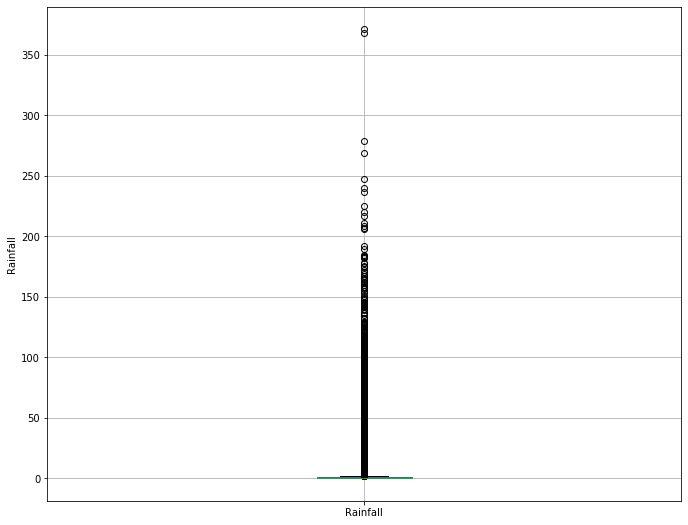

In [35]:
plt.figure(figsize=(25,20))


plt.subplot(2, 2, 1)
fig = data2.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

## plotting histogram to check distribution is normal or skewed

Text(0, 0.5, 'RainTomorrow')

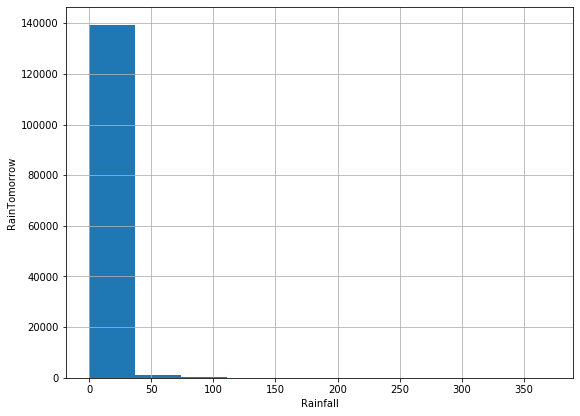

In [36]:
plt.figure(figsize=(20,15))


plt.subplot(2, 2, 1)
fig = data2.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

## as distribution is skewed we will use interquantile range to find outliers

In [37]:
IQR = data2.Rainfall.quantile(0.75) - data2.Rainfall.quantile(0.25)
Lower_fence = data2.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data2.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [38]:
from scipy import stats
z = np.abs(stats.zscore(data3._get_numeric_data()))
print(z)
data3= data3[(z < 3).all(axis=1)]
print(data3.shape)

[[0.11756741 0.10822071 0.20666127 ... 1.87866615 1.60184776 1.67397064]
 [0.84180219 0.20684494 0.27640495 ... 1.87866615 1.60184776 1.56020868]
 [0.03761995 0.29277194 0.27640495 ... 1.87866615 1.60184776 1.44644672]
 ...
 [1.44940294 0.23548728 0.27640495 ... 1.67837697 0.12412592 0.71503058]
 [1.16159206 0.46462594 0.27640495 ... 1.67837697 0.12412592 0.82879255]
 [0.77784422 0.4789471  0.27640495 ... 1.67837697 0.12412592 0.94255451]]
(107868, 20)


# Visualising the correlations within Table

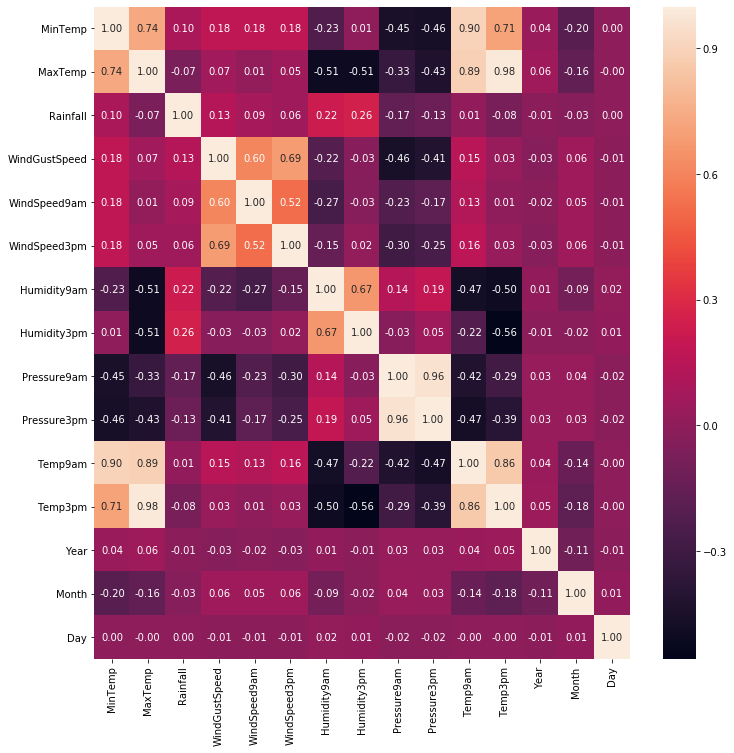

In [39]:
fig, ax = plt.subplots(figsize=[12,12])
sns.heatmap(data2.corr(),fmt=".2f",annot=True)

# Interpretation¶
### From the above correlation heat map, we can conclude that :-

### MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

### MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

### MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

### MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

### MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

### WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

### Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

### Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86)

# An Intuitive visualization on the relations of Rainy days and Humidity/Pressure

Text(0, 0.5, 'humidity at 3pm')

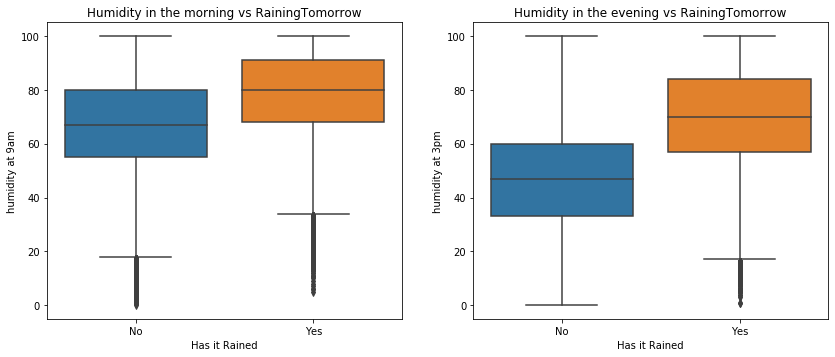

In [40]:
#Multiplotting
plt.figure(1,figsize=[14,12])

#Subplot 1
plt.subplot(2,2,1)
sns.boxplot(data=data2,y="Humidity9am",x="RainTomorrow")
plt.title("Humidity in the morning vs RainingTomorrow")
plt.xlabel("Has it Rained")
plt.ylabel("humidity at 9am")



#Subplot 2
plt.subplot(2,2,2)
sns.boxplot(data=data2,y="Humidity3pm",x="RainTomorrow")
plt.title("Humidity in the evening vs RainingTomorrow")
plt.xlabel("Has it Rained")
plt.ylabel("humidity at 3pm")



Text(0, 0.5, 'Pressure at 3pm')

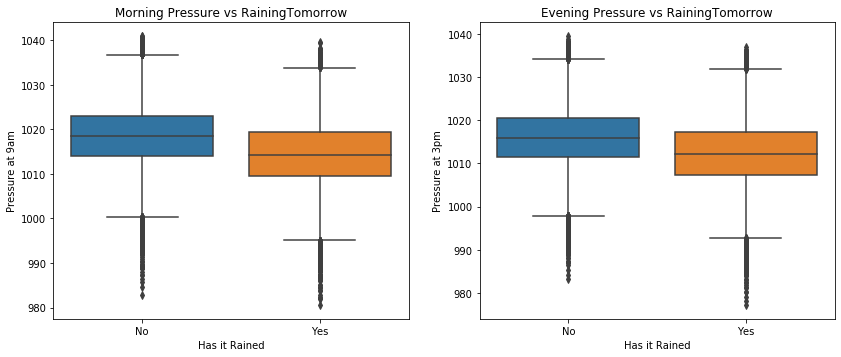

In [41]:
plt.figure(1,figsize=[14,12])
#Subplot 1
plt.subplot(2,2,1)
sns.boxplot(data=data2,y="Pressure9am",x="RainTomorrow")
plt.title("Morning Pressure vs RainingTomorrow")
plt.xlabel("Has it Rained")
plt.ylabel("Pressure at 9am")

#Subplot 2
plt.subplot(2,2,2)
sns.boxplot(data=data2,y="Pressure3pm",x="RainTomorrow")
plt.title("Evening Pressure vs RainingTomorrow")
plt.xlabel("Has it Rained")
plt.ylabel("Pressure at 3pm")

# Monthwise comparision of Temparature/Humidity



(-10, 50)

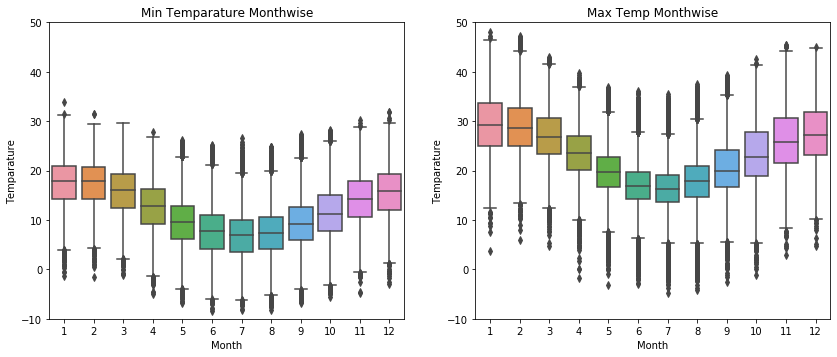

In [42]:
#Multiplotting
plt.figure(1,figsize=[14,12])

#Subplot 1
plt.subplot(2,2,1)
sns.boxplot(data=data2,y="MinTemp",x="Month")
plt.title("Min Temparature Monthwise")
plt.xlabel("Month")
plt.ylabel("Temparature")
plt.ylim([-10,50])

#Subplot 2
plt.subplot(2,2,2)
sns.boxplot(data=data2,y="MaxTemp",x="Month")
plt.title("Max Temp Monthwise")
plt.xlabel("Month")
plt.ylabel("Temparature")
plt.ylim([-10,50])



Text(0, 0.5, 'Evening Humidity')

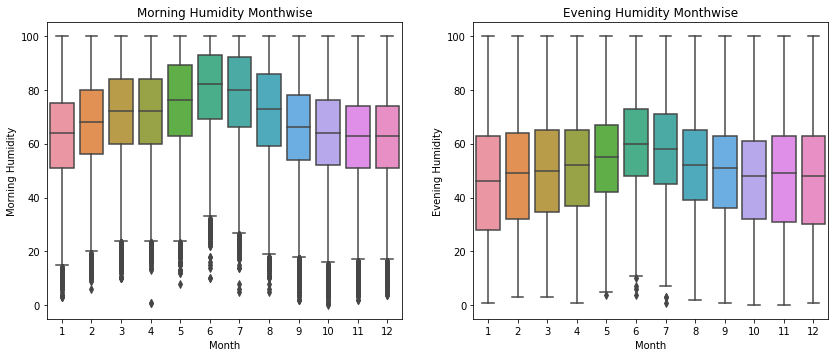

In [43]:
plt.figure(1,figsize=[14,12])
#Subplot 3
plt.subplot(2,2,1)
sns.boxplot(data=data2,y="Humidity9am",x="Month")
plt.title("Morning Humidity Monthwise")
plt.xlabel("Month")
plt.ylabel("Morning Humidity")

#Subplot 4
plt.subplot(2,2,2)
sns.boxplot(data=data2,y="Humidity3pm",x="Month")
plt.title("Evening Humidity Monthwise")
plt.xlabel("Month")
plt.ylabel("Evening Humidity")

# Standardization

In [44]:
#Lets deal with the categorical cloumns now
# simply change yes/no to 1/0 for RainToday and RainTomorrow
data3['RainToday'].replace({'No': 0, 'Yes': 1})
data3['RainTomorrow'].replace({'No': 0, 'Yes': 1})

#See unique values and convert them to int using pd.getDummies()
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(data3[col]))
# transform the categorical columns
data3 = pd.get_dummies(data3, columns=categorical_columns)
data3.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,1,0,0,0,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,1,0,0,0,0,0,0


In [45]:
data3.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#next step is to standardize our data - using MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(data3[numerical])
data3 = pd.DataFrame(scaler.transform(data3[numerical]), index=data3[numerical].index, columns=data3[numerical].columns)
data3.iloc[1:5]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day
1,0.358289,0.518519,0.000000,0.506849,0.054054,0.476190,0.370787,0.25,0.337292,0.326139,0.486702,0.535533,0.1,1.0,0.033333
2,0.505348,0.533333,0.000000,0.534247,0.459459,0.571429,0.303371,0.30,0.266033,0.347722,0.587766,0.507614,0.1,1.0,0.066667
3,0.406417,0.590123,0.000000,0.232877,0.243243,0.166667,0.382022,0.16,0.503563,0.446043,0.510638,0.591371,0.1,1.0,0.100000
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,0.502660,0.672589,0.1,1.0,0.133333


# Hypothesis testing

In [47]:
from statsmodels.stats import weightstats as mm

In [48]:
data4=data2.fillna(data2.mean())

In [49]:
n=len(data4["Humidity3pm"])
mean=data4["Humidity3pm"].mean()
sd=data4["Humidity3pm"].std()
(n,mean,sd)

(142193, 51.48260609165429, 20.532065476037054)

In [50]:
ztest,pvals=mm.ztest(data4["Humidity3pm"],value=51.48,alternative="larger")  #value is the null hypothesis; larger is for alternate hypothesis: means prop > value.
print("p-value",pvals)

p-value 0.48091287888195905


In [51]:
if pvals<=0.05:
    print("We reject NULL hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis
